## Testing the Extreme Learning Machine
Here we will test the performance of the ELM on very simple data: we will fit a vector function with added Gaussian noise

$$\mathbf{f}(\mathbf{x}) = (\sin(\mathbf{x}), \cos(\mathbf{x}))$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Let's visualize the training data first:

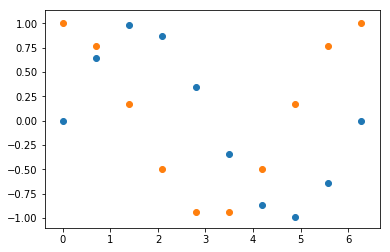

In [64]:
n_samples = 10
X = np.linspace(0, 2*np.pi, n_samples).reshape((1, n_samples))
T = np.vstack((np.sin(X), np.cos(X)))
plt.scatter(X.T, T[0,:])
plt.scatter(X.T, T[1,:])

We will now train an ELM as a model for this data. I wonder what's the initial Mean Square Error for the training data.

In [65]:
from elm import ExtremeLearningMachine

elm = ExtremeLearningMachine(n_input=X.shape[0], n_hidden=5, n_output=T.shape[0])
print("MSE is currently", elm.mse(X, T))

MSE is currently 347.746371897


This looks like an already good starting point. Let's train it to see how better it gets.

In [66]:
elm.train(X, T)
print("MSE is now", elm.mse(X, T))

MSE is now 0.0815603582799


Now we can visualize the predictions for new data.

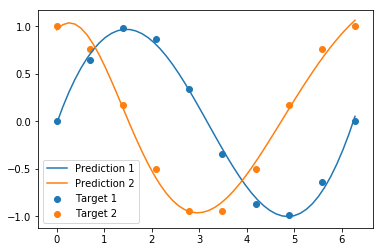

In [67]:
n_test = 50
X_test = np.linspace(0, 2*np.pi, n_test).reshape((1, n_test))
T_pred = elm.predict(X_test)

plt.plot(X_test.T, T_pred[0,:].T, label="Prediction 1")
plt.plot(X_test.T, T_pred[1,:].T, label="Prediction 2")
plt.scatter(X.T, T[0,:], label="Target 1")
plt.scatter(X.T, T[1,:], label="Target 2")
plt.legend()

Not bad! Nevertheless, the ELM is inherently non-deterministic, since the weights of the first layer are random. We can examine this property more closely. We will train ELMs with 3, 5 and 7 hidden units. For each number of hidden units, we will train 1000 ELMs. Then we will check the obtained MSE for these cases.

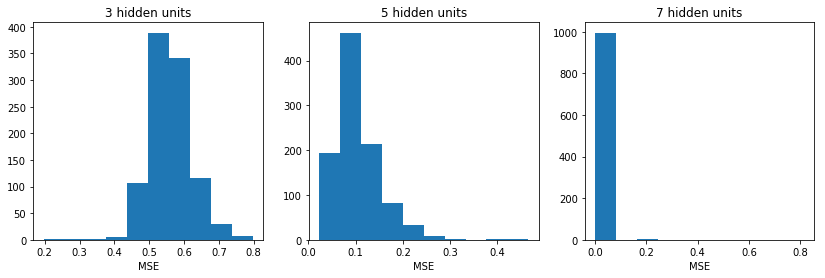

In [68]:
n_trials = 1000
mse_values = np.zeros(n_trials)
n_hidden_values = [3, 5, 7]

plt.figure(figsize=(14, 4))

for n, n_hidden in enumerate(n_hidden_values):
    for i in range(n_trials):
        elm = ExtremeLearningMachine(n_input=X.shape[0], n_hidden=n_hidden, n_output=T.shape[0])
        elm.train(X, T)
        mse_values[i] = elm.mse(X, T)
    
    plt.subplot(1, len(n_hidden_values), n+1)
    plt.hist(mse_values)
    plt.title("{:d} hidden units".format(n_hidden))
    plt.xlabel("MSE")

Clearly, by increasing the number of hidden units the error is more likely to be smaller.